### Importing and talking to the APi

------

<br>

Lets start importing the libraries we need

In [286]:
import requests
import pandas as pd

Another things we need is our APi key to access the Riot Api with the diferents Urls and end points.

In [287]:
api_key='RGAPI-7befa852-19d4-4b79-9a31-84f2af5b630d'

In [288]:
url='https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/zyb'

In [289]:
header = {"X-Riot-Token":api_key}

<br>

Make the request adding the Api key, the correct end point and the name of the player, in this case I have choose Zyb which is a Grand master player who plays in EUW.
we make the request to summoners as we need the puuid of this player to obtein the match Id of his last 20 gameplays, 20 game plays are set as default we could get more games and get more accurate results if we need it, I have set it to 50.

In [290]:
response=requests.get(url,headers=header,timeout=10)

In [291]:
response.json()

{'id': 'YMCB1nGe-nvZV67PUcyAr8KaLntxPnZN97sGKv_ZiKIniReZEgrm9OyigQ',
 'accountId': 'vUAqTkM3ZyRZbC_cgKA25Gjt2b--jp7K63lcBDZI1lZT3tSbvM6ce9ZO',
 'puuid': 'WPprhidbXpsGSwqjHLWk2SMJZdpAfdiihdMOjgfngMWY5dgSF_lSaq45ujDFzHEJz92nwzNNUL5AyQ',
 'name': 'zyb',
 'profileIconId': 5663,
 'revisionDate': 1679924873295,
 'summonerLevel': 136}

with his puuid we access to the match Id.


<br>

In [292]:
url_match='https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/WPprhidbXpsGSwqjHLWk2SMJZdpAfdiihdMOjgfngMWY5dgSF_lSaq45ujDFzHEJz92nwzNNUL5AyQ/ids?start=0&count=50'
response_match=requests.get(url_match,headers=header,timeout=10)

Now we have a list of 50 matchs this Summoner has played. With the name of this matches we can extract all the stats from each one of them. After applying json() we get the list of the matches that will be our index for the dataframe and the query for the next APi.

In [293]:
response_match.json()

['EUW1_6334182329',
 'EUW1_6334138130',
 'EUW1_6333791257',
 'EUW1_6333781958',
 'EUW1_6333744792',
 'EUW1_6332571037',
 'EUW1_6332040070',
 'EUW1_6331966181',
 'EUW1_6331909234',
 'EUW1_6331375296',
 'EUW1_6331066893',
 'EUW1_6330918243',
 'EUW1_6330856930',
 'EUW1_6330241937',
 'EUW1_6330106375',
 'EUW1_6329176323',
 'EUW1_6329150089',
 'EUW1_6329137083',
 'EUW1_6327564968',
 'EUW1_6327237577',
 'EUW1_6327152713',
 'EUW1_6327076064',
 'EUW1_6326993452',
 'EUW1_6326291632',
 'EUW1_6325772516',
 'EUW1_6325698045',
 'EUW1_6325634887',
 'EUW1_6325576196',
 'EUW1_6325510442',
 'EUW1_6325446174',
 'EUW1_6325372216',
 'EUW1_6321634881',
 'EUW1_6321617676',
 'EUW1_6321597161',
 'EUW1_6321571200',
 'EUW1_6321546091',
 'EUW1_6321508258',
 'EUW1_6320986411',
 'EUW1_6320177912',
 'EUW1_6320170558',
 'EUW1_6320150194',
 'EUW1_6320130940',
 'EUW1_6320106012',
 'EUW1_6319861726',
 'EUW1_6319702065',
 'EUW1_6319030154',
 'EUW1_6319008422',
 'EUW1_6317430296',
 'EUW1_6317395401',
 'EUW1_6317362884']

<br>

### Getting the Stats of each game and extracting it

-----

<br>

The code below will iterate between each one of the game requesting the metadata that we will be using to make our analysis. The response is then passed to a json format, it contains a huge amount of data that the game provide about stats that happened during the game, I have selected a few indicators that the code will look for on that data and will extract it and stored in a dictionary to make later the dataframe.


Lets extract the information we need

In [294]:
dict_3={}
dicc_blue={}
dicc_red={}
# list of the matches

for everymatch in response_match.json():
    match_stats=requests.get(f'https://europe.api.riotgames.com/lol/match/v5/matches/{everymatch}',headers=header)
    match_stats=match_stats.json()
    
# find_for is the list of term that the code will look for in  the data requested.
    find_for=['assists','deaths',"baronKills","dragonKills","goldEarned","kills","totalDamageDealtToChampions","trueDamageDealtToChampions","wardsPlaced","wardsKilled",'win']
# since there is always 10 players the first 5 will be part of blue team and the other 5 to red.
# this will create the dictionary of the blue team.    
    for x in range(0,5):
        for k,v in match_stats['info']['participants'][x].items():
            
            for y in find_for:    
                if k==y  :
                    if k=='win' and k not in dicc_blue:
                        dicc_blue[k+'Blue']=v
                    elif k+'Blue' not in dicc_blue:
                        dicc_blue[k+'Blue']=v
                    else:
                        dicc_blue[k+'Blue']+=v
                   
    for k,v in dicc_blue.items():
        if k not in dict_3:
            dict_3[k]=[v]
        else  :
            dict_3[k].append(v)
                    
    dicc_blue={}              

        
    # this will get the stats for the red team

    for x in range(5,10):
        for k,v in match_stats['info']['participants'][x].items():
            
            for y in find_for:    
                if k==y  :
                    if k=='win' and k not in dicc_red:
                        dicc_red[k+'Red']=v
                    elif k+'Red' not in dicc_red:
                        dicc_red[k+'Red']=v
                    else:
                        dicc_red[k+'Red']+=v
                
    for k,v in dicc_red.items():
        if k not in dict_3:
            dict_3[k]=[v]
        else  :
            dict_3[k].append(v)
    dicc_red={}

print(dict_3)

{'assistsBlue': [8, 86, 33, 0, 39, 31, 39, 19, 45, 49, 31, 33, 31, 30, 45, 48, 29, 0, 24, 70, 18, 22, 21, 13, 22, 21, 46, 27, 22, 26, 87, 172, 154, 132, 139, 160, 173, 83, 120, 69, 109, 177, 130, 32, 17, 43, 14, 124, 133, 183], 'baronKillsBlue': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'deathsBlue': [15, 28, 39, 0, 32, 35, 37, 30, 15, 13, 7, 29, 43, 30, 25, 21, 31, 0, 14, 24, 31, 38, 44, 32, 23, 25, 12, 35, 27, 27, 13, 49, 49, 33, 77, 48, 61, 66, 99, 44, 41, 53, 56, 36, 30, 6, 4, 65, 68, 72], 'dragonKillsBlue': [1, 1, 0, 0, 2, 2, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 1, 0, 2, 4, 0, 1, 1, 0, 0, 1, 3, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], 'goldEarnedBlue': [25770, 69652, 52757, 2602, 59447, 54160, 62516, 47355, 47474, 51221, 38830, 55745, 55070, 66499, 57525, 42500, 57334, 2500, 34356, 67728, 48065, 56566, 50400, 35919, 39248, 37342, 63609, 38745, 40357, 

<br>

we see how the code extract one by one the stats that will form the rows of our dataframe, at the end we have the resulting dictionary.

<br>

### Formating to Dataframe and Analysis

-----

Convert that dictionary into a dataframe using of index the name of the match.

In [295]:
pd.DataFrame(dict_3,index=response_match.json())

,assistsBlue,baronKillsBlue,deathsBlue,dragonKillsBlue,goldEarnedBlue,killsBlue,totalDamageDealtToChampionsBlue,trueDamageDealtToChampionsBlue,wardsKilledBlue,wardsPlacedBlue,...,baronKillsRed,deathsRed,dragonKillsRed,goldEarnedRed,killsRed,totalDamageDealtToChampionsRed,trueDamageDealtToChampionsRed,wardsKilledRed,wardsPlacedRed,winRed
EUW1_6334182329,8,0,15,1,25770,8,26376,1077,16,34,...,0,8,1,33772,15,35760,761,10,41,True
EUW1_6334138130,86,1,28,1,69652,38,152115,8426,42,120,...,1,38,3,61595,28,135071,11697,34,100,False
EUW1_6333791257,33,0,39,0,52757,21,115013,9093,19,68,...,2,21,4,64520,38,131150,14813,17,64,True
EUW1_6333781958,0,0,0,0,2602,0,724,95,0,1,...,0,0,0,2570,0,319,0,0,1,False
EUW1_6333744792,39,0,32,2,59447,27,98503,5304,26,71,...,2,27,2,65906,32,108295,10675,27,87,True
EUW1_6332571037,31,0,35,2,54160,18,95477,5482,30,73,...,2,18,1,69653,35,112633,14225,27,85,True
EUW1_6332040070,39,0,37,1,62516,34,103101,3959,27,93,...,2,35,2,63344,37,122170,15774,37,72,False
EUW1_6331966181,19,0,30,1,47355,19,74717,14821,10,60,...,1,19,3,57557,30,79411,6654,19,49,True
EUW1_6331909234,45,0,15,2,47474,32,62590,4405,10,34,...,0,32,0,35075,15,31449,1594,8,36,False
EUW1_6331375296,49,1,13,3,51221,29,66009,3276,28,62,...,0,29,0,39405,13,41516,1660,23,54,False


At this point we could do the analysis in the platform of preference like excel, sql or python.

Lets assign the dataframe to df and do a correlation heatmap to see the correlation between columns to help us see if there is something correlated to the victory.

In [296]:
df=pd.DataFrame(dict_3,index=response_match.json())

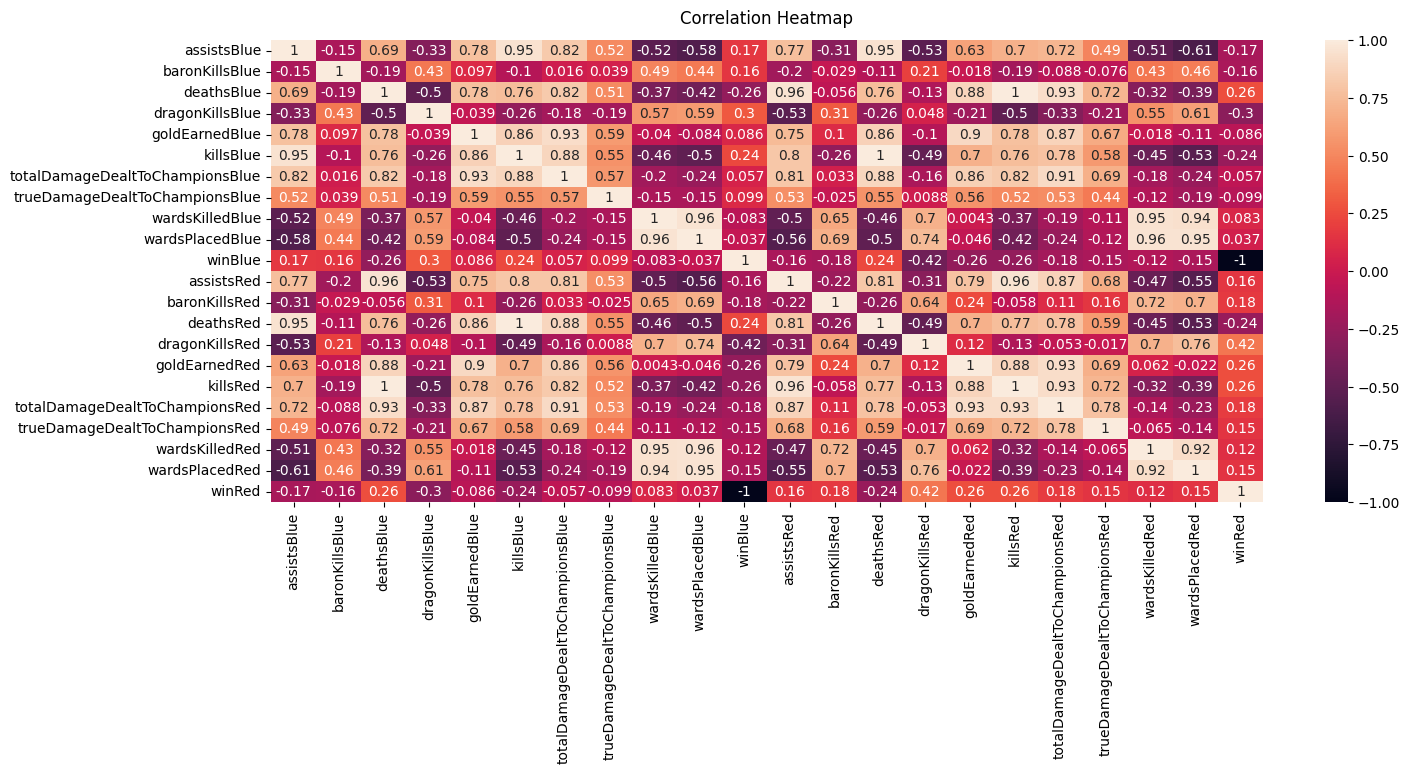

In [313]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Dragonkills, kills, goldearned, and baronkills are related to the victory but lets have a look to more interesting relationships.

### Team sides

-----

In [298]:
df['winRed'].where(df['winRed']).dropna().count()/50

0.62

*62 %* of times red team wins, *38 %* win rate for blue team which seems crearly biased probably due to the lack of more samples nothing we couldn't fix easily.

<br>

### Wards

-----

Lets check the vision now, focusing when red team win to see if the wards impacted the victory.We filter the dataframe when red team won and look the wards comparison.

In [299]:
df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winRed']==True).dropna()

,wardsPlacedBlue,wardsPlacedRed
EUW1_6334182329,34.0,41.0
EUW1_6333791257,68.0,64.0
EUW1_6333744792,71.0,87.0
EUW1_6332571037,73.0,85.0
EUW1_6331966181,60.0,49.0
EUW1_6330918243,89.0,93.0
EUW1_6330856930,54.0,75.0
EUW1_6330241937,82.0,104.0
EUW1_6329176323,45.0,56.0
EUW1_6329150089,86.0,69.0


In [300]:
df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winRed']==True).dropna().mean()['wardsPlacedRed']/df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winRed']==True).dropna().mean()['wardsPlacedBlue']

1.0974842767295598

 When red team won, Red team put *10 %* more wards that blue team. Lets do the same with Blue team.

In [301]:
df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winBlue']==True).dropna()

,wardsPlacedBlue,wardsPlacedRed
EUW1_6334138130,120.0,100.0
EUW1_6333781958,1.0,1.0
EUW1_6332040070,93.0,72.0
EUW1_6331909234,34.0,36.0
EUW1_6331375296,62.0,54.0
EUW1_6331066893,32.0,37.0
EUW1_6330106375,45.0,48.0
EUW1_6327564968,32.0,32.0
EUW1_6327237577,78.0,80.0
EUW1_6325634887,93.0,75.0


In [302]:
df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winBlue']==True).dropna().mean()['wardsPlacedBlue']/df[['wardsPlacedBlue','wardsPlacedRed']].where(df['winBlue']==True).dropna().mean()['wardsPlacedRed']

1.119448698315467

When blue team won they placed *12%* of wards more than the enemy team.

<br>
<br>

### Dragons

----

In [314]:
df[['dragonKillsBlue','dragonKillsRed']].where(df['winBlue']==True).dropna().mean()['dragonKillsBlue']/df[['dragonKillsBlue','dragonKillsRed']].where(df['winBlue']==True).dropna().mean()['dragonKillsRed']

3.2500000000000004

In term of victory with Dragons counts, when Blue team won they had *3.35* times more Dragons than their enemy.

In [316]:
df[['dragonKillsBlue','dragonKillsRed']].where(df['winRed']==True).dropna().mean()['dragonKillsRed']/df[['dragonKillsBlue','dragonKillsRed']].where(df['winRed']==True).dropna().mean()['dragonKillsBlue']

2.1904761904761907

When Red team won they had *2.20* more Dragons than their enemy.

Another strong relation that we see in both teams is that wards, both wardskilled and wardsplaced are related to Dragons wich tell us that vision around Dragons are important to get the takedown on Dragons.

To summerize we could say that:
* The sides (blue,red) can help to incline the victory towards red but the more samples we use the less difference we find, which could means or makes us think that there is not a clear difference if the sample size is big enough.
* The stronges correlation with victory it seems to be objetives like Dragons and Baron kills and at the same time Dragons and Baron and higly correlated to map vision which means wards placed and killed.
* The team who wins has on average between 10 % - 12 % more wards placed that their competitor.
* If you want to win make sure that you have at least 2 times more Dragons that your enemy!!.


-----